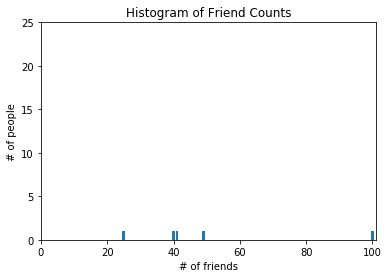

In [3]:
'''
統計學 (Statistics)
'''
# description data
num_friends = [100, 49, 41, 40, 25,
              # ... 
              ]

# 繪製直方圖 (histogram)
# use "Counter" and "plt.bar()"
from collections import Counter
from matplotlib import pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)                           # maximize number is 100
ys = [friend_counts[x] for x in xs]       # height is friend's number
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [9]:
num_points = len(num_friends)      # calculate number point
print(num_points)

largest_value = max(num_friends)  # maximize value
print(largest_value)

smallest_value = min(num_friends)      # minimize value
print(smallest_value)
print("---------------")

# we want to know locattion
sorted_values = sorted(num_friends)    # from smallest to largest rank
print(sorted_values)

smallest_value = sorted_values[0]
print(smallest_value)

second_smallest_value = sorted_values[1]
print(second_smallest_value)

second_largest_value = sorted_values[-2]
print(second_largest_value)

5
100
25
---------------
[25, 40, 41, 49, 100]
25
40
49


In [33]:
'''
中央趨勢
# 如果前面少了 from __future__ import division
# 這段程式碼就無法計算出正確的結果
'''
# 平均數 (mean)
def mean(x):
    return sum(x) / len(x)
print("mean :", mean(num_friends))       # 51.0

# 中位數 (median)
def median(v):
    '''
    找出落在 v 最中央位置的數值
    '''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if it's odd, directly feedback to median
        return sorted_v[midpoint]
    else:
        # if it's even, feedback to two central location of mean
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
print("median :", median(num_friends))     # 41

# 分位數 (quantile)
def quantitle(x, p):
    '''
    送回 x 裡頭正好位於第 p 百分比位置的那個數值
    '''
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("quantitle 0.10 :", quantitle(num_friends, 0.10))       # 25
print("quantitle 0.25 :", quantitle(num_friends, 0.25))       # 40
print("quantitle 0.75 :", quantitle(num_friends, 0.75))       # 49
print("quantitle 0.90 :", quantitle(num_friends, 0.90))       # 100
print("---------------")

# 眾數 (mode)
# def mode(x):
#     '''
#     送回一個列表，放的是眾數 (數量可能不只一個)
#     '''
#     counts = Counter(x)
#     max_count = max(counts.values())
#     return [x_i for x_i, count in counts.iteritems()
#            if count == max_count]
# print(mode(num_friends))
# print("---------------")

# 離散程度 (Dispersion)
# "range" 在 python 中有其他意義，所以我們使用另一個不同的名稱
def data_range(x):
    return max(x) - min(x)
print("range :", data_range(num_friends))


##############################################

# 之前定義的函式
def dot(v, w):
    '''
    v_1 * w_1 + ... + v_n * w_n
    相應元素相乘之後的結果
    '''
    return sum(v_i * w_i
              for v_i, w_i in zip(v,w))

def sum_of_squares(v):
    '''
    v_1 * v_1 + ... + v_n * v_n
    '''
    return dot(v, v)

##############################################

# 變異數 (variance)
def de_mean(x):
    '''
    把 x 轉換成每個元素與平均值的差值 (平均數為 0)
    '''
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    '''
    假設 x 至少有兩個元素
    '''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / ( n - 1)
print("variance :", variance(num_friends))
print("---------------")

# 標準差 (standard deviation)
import math
def standard_deviation(x):
    return math.sqrt(variance(x))
print("standard_deviation : %.4f" % standard_deviation(num_friends))    # %.4f 取小數點後四位數

def interquartile_range(x):
    return quantitle(x, 0.75) - quantitle(x, 0.25)
print("interquartile_range :", interquartile_range(num_friends))

mean : 51.0
median : 41
quantitle 0.10 : 25
quantitle 0.25 : 40
quantitle 0.75 : 49
quantitle 0.90 : 100
---------------
range : 75
variance : 825.5
---------------
standard_deviation : 28.7315
interquartile_range : 9


In [39]:
'''
相關
'''
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                 41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,
                 32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,
                 26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,
                 38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,
                 24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,
                 26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,
                 24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
                 44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,
                 26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,
                 14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,
                 32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,
                 22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,
                 27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,
                 16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
                 33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

# 共變異數 (covariance)
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / ( n - 1 )
print("covariance : %.4f" % covariance(num_friends, daily_minutes))
      
# 相關係數 (correlation)
def correlation(x,y):
      stdev_x = standard_deviation(x)
      stdev_y = standard_deviation(y)
      if stdev_x > 0 and stdev_y > 0 :
          return covariance(x, y) / stdev_x / stdev_y
      else:
          return 0       # if not variance, correlation is 0
print("correlation : %.4f" % correlation(num_friends, daily_minutes))
print("---------------")

outlier = num_friends.index(100)

num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x
                     for i, x in enumerate(daily_minutes)
                     if i != outlier]

print("adjust correlation : %.4f" % correlation(num_friends_good, daily_minutes_good))

covariance : -542.8200
correlation : -1.8819
---------------
adjust correlation : 1.2073


In [41]:
'''
辛普森悖論

# 忽略某些變數，而造成相關係數被誤導的結果
# 運用相關係數衡量兩個變數之間的關係
# --> 前提假設「其他條件全都相同」，資料具有一定的隨機性
'''
# 相關係數為零
# 僅表示兩個變數之間不存在線性關係
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]
print("correlation : %.4f" % correlation(x, y))
print("---------------")

y1 = [99.98, 99.99, 100, 100.01, 100.02]
print("correlation : %.4f" % correlation(x, y1))    # 兩組變數呈現完全正相關

correlation : 0.0000
---------------
correlation : 1.0000
